# Using Learning Rate Schedule in PyTorch Training

Training a neural network or large deep learning model is a difficult optimization task.

The classical algorithm to train neural networks is called stochastic gradient descent. 
It has been well established that you can achieve increased performance and faster training on some problems by using a learning rate that changes during training.

In this tutorial, you will discover what is learning rate schedule and how you can use different learning rate schedules for your neural network models in PyTorch.

## Outcome

After reading this tutorial, you will know:

- Why learning rate schedule is important
- The role of learning rate schedule in model training
- How to use learning rate schedule in PyTorch training loop

## Overview

This tutorial is divided into three parts

- Training with a Fixed Learning Rate
- Learning Rate Schedule for Training Models
- Applying Learning Rate Schedule in PyTorch Training

## Learning Rate for Training Models

Gradient descent is an algorithm of numerical optimization. 
What it does is to update parameters using the formula:

$$
w := w – \alpha \dfrac{dy}{dw}
$$

In this formula, $w$ is the parameter, e.g., the weight in a neural network, and $y$ is the objective, e.g., the loss function. 
What it does is to move $w$ to the direction that you can minimize $y$. 
The direction is provided by the differentiation, $\dfrac{dy}{dw}$, but how much you should move $w$ is controlled by the **learning rate** $\alpha$.

Let's start with an example model. 
In below, a model is to solve the [ionosphere binary classification problem](http://archive.ics.uci.edu/ml/datasets/Ionosphere). 
This is a small dataset that you can download from [the UCI Machine Learning repository](https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data). 

The ionosphere dataset is good for practicing with neural networks because all the input values are small numerical values of the same scale.

A small neural network model is constructed with a single hidden layer with 34 neurons, using the ReLU activation function. 
The output layer has a single neuron and uses the sigmoid activation function in order to output probability-like values.

Plain stochastic gradient descent algorithm is used, with a fixed learning rate 0.1. 
The model is trained for 50 epochs. 
The state parameters of an optimizer can be found in optimizer.param_groups; which the learning rate is a floating point value at optimizer.param_groups[0]["lr"]. 
At the end of each epoch, the learning rate from the optimizer is printed.

The complete example is listed below.

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# load dataset, split into input (X) and output (y) variables
dataframe = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data",
    header=None)
dataset = dataframe.values
X = dataset[:, 0:34].astype(float)
y = dataset[:, 34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.7,
                                                    shuffle=True)

model = nn.Sequential(nn.Linear(34, 34), nn.ReLU(), nn.Linear(34, 1),
                      nn.Sigmoid())

train_loss_list = []

# Train the model
n_epochs = 50
batch_size = 24
batch_start = torch.arange(0, len(X_train), batch_size)
lr = 1
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
model.train()
for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("Epoch %d: SGD lr=%.4f" % (epoch, optimizer.param_groups[0]["lr"]))

    train_loss_list.append(loss.detach())

Epoch 0: SGD lr=1.0000
Epoch 1: SGD lr=1.0000
Epoch 2: SGD lr=1.0000
Epoch 3: SGD lr=1.0000
Epoch 4: SGD lr=1.0000
Epoch 5: SGD lr=1.0000
Epoch 6: SGD lr=1.0000
Epoch 7: SGD lr=1.0000
Epoch 8: SGD lr=1.0000
Epoch 9: SGD lr=1.0000
Epoch 10: SGD lr=1.0000
Epoch 11: SGD lr=1.0000
Epoch 12: SGD lr=1.0000
Epoch 13: SGD lr=1.0000
Epoch 14: SGD lr=1.0000
Epoch 15: SGD lr=1.0000
Epoch 16: SGD lr=1.0000
Epoch 17: SGD lr=1.0000
Epoch 18: SGD lr=1.0000
Epoch 19: SGD lr=1.0000
Epoch 20: SGD lr=1.0000
Epoch 21: SGD lr=1.0000
Epoch 22: SGD lr=1.0000
Epoch 23: SGD lr=1.0000
Epoch 24: SGD lr=1.0000
Epoch 25: SGD lr=1.0000
Epoch 26: SGD lr=1.0000
Epoch 27: SGD lr=1.0000
Epoch 28: SGD lr=1.0000
Epoch 29: SGD lr=1.0000
Epoch 30: SGD lr=1.0000
Epoch 31: SGD lr=1.0000
Epoch 32: SGD lr=1.0000
Epoch 33: SGD lr=1.0000
Epoch 34: SGD lr=1.0000
Epoch 35: SGD lr=1.0000
Epoch 36: SGD lr=1.0000
Epoch 37: SGD lr=1.0000
Epoch 38: SGD lr=1.0000
Epoch 39: SGD lr=1.0000
Epoch 40: SGD lr=1.0000
Epoch 41: SGD lr=1.0000
Ep

You can confirm that the learning rate didn't change over the entire training process. 

### It is hard to converge if a large learning rate is chosen

We can plot the learning curve (loss v.s. epoch), which shows how the model is trained iteratively.

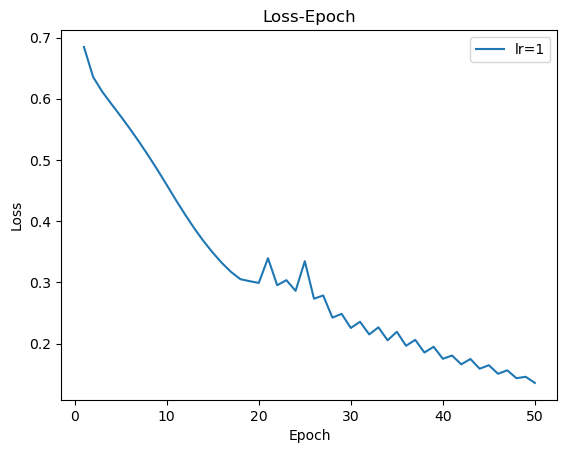

In [2]:
plt.figure()
plt.title('Loss-Epoch')
plt.plot(range(1, len(train_loss_list) + 1), train_loss_list, label=f'lr={lr}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

As you can see, the loss decreases rapidly in the first 15 epoches.
However, after Epoch 15, the loss curve fluctuates diverges.

### It is slow to train models if a small learning rate is chosen

If one takes a smaller learning, the learning curve is:

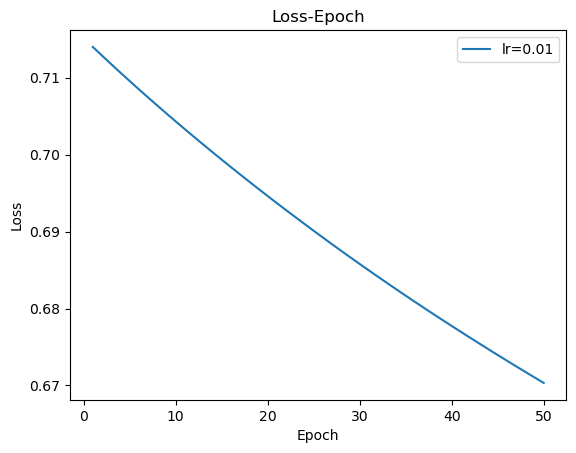

In [3]:
# large learning rate with plot
# create model
model = nn.Sequential(nn.Linear(34, 34), nn.ReLU(), nn.Linear(34, 1),
                      nn.Sigmoid())

train_loss_list = []

# Train the model
n_epochs = 50
batch_size = 24
batch_start = torch.arange(0, len(X_train), batch_size)
lr = 0.01
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
model.train()
for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()   
    train_loss_list.append(loss.detach())

plt.figure()
plt.title('Loss-Epoch')
plt.plot(range(1, len(train_loss_list) + 1), train_loss_list, label=f'lr={lr}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

After 50 epoches, the loss function is large and can be further optimized.

It is ideal if the learning rate is large at the beginning to speech up the training while the learning rate is smaller after a few epoches to have a stable learning curve.

A learning rate scheduler is able to dynamically adjust the learng rate.

## Learning Rate Schedule for Training Models

An easy start is to use a constant learning rate in gradient descent algorithm. 
But you can do better with a **learning rate schedule**. 
A schedule is to make learning rate adaptive to the gradient descent optimization procedure, so you can increase performance and reduce training time.

In the neural network training process, data is feed into the network in batches, with many batches in one epoch. 
Each batch triggers one training step, which the gradient descent algorithm updates the parameters once. 
However, usually the learning rate schedule is updated once for each training epoch only.

You can update the learning rate as frequent as each step but usually it is updated once per epoch because you want to know how the network performs in order to determine how the learning rate should update. 
Regularly, a model is evaluated with validation dataset once per epoch.

There are multiple ways of making learning rate adaptive. 
At the beginning of training, you may prefer a larger learning rate so you improve the network coarsely to speed up the progress. 
In a very complex neural network model, you may also prefer to gradually increasse the learning rate at the beginning because you need the network to explore on the different dimensions of prediction. 
At the end of training, however, you always want to have the learning rate smaller. 
Since at that time, you are about to get the best performance from the model and it is easy to overshoot if the learning rate is large.

Therefore, the simplest and perhaps most used adaptation of the learning rate during training are techniques that reduce the learning rate over time. 
These have the benefit of making large changes at the beginning of the training procedure when larger learning rate values are used and decreasing the learning rate so that a smaller rate and, therefore, smaller training updates are made to weights later in the training procedure.

This has the effect of quickly learning good weights early and fine-tuning them later.

Next, let's look at how you can set up learning rate schedules in PyTorch.

## Applying Learning Rate Schedules in PyTorch Training

In PyTorch, a model is updated by an optimizer and learning rate is a parameter of the optimizer. 
Learning rate schedule is an algorithm to update the learning rate in an optimizer.

Below is an example of creating a learning rate schedule:

There are many learning rate scheduler provided by PyTorch in torch.optim.lr_scheduler submodule. 
All the scheduler needs the optimizer to update as first argument. 
Depends on the scheduler, you may need to provide more arguments to set up one.

Let's make the training process start with a larger learning rate and end with a smaller rate. 
To introduce a learning rate scheduler, you need to run its step() function in the training loop. 
The code above is modified into the following:

Epoch 0: SGD lr 1.0000 -> 0.9767
Epoch 1: SGD lr 0.9767 -> 0.9533
Epoch 2: SGD lr 0.9533 -> 0.9300
Epoch 3: SGD lr 0.9300 -> 0.9067
Epoch 4: SGD lr 0.9067 -> 0.8833
Epoch 5: SGD lr 0.8833 -> 0.8600
Epoch 6: SGD lr 0.8600 -> 0.8367
Epoch 7: SGD lr 0.8367 -> 0.8133
Epoch 8: SGD lr 0.8133 -> 0.7900
Epoch 9: SGD lr 0.7900 -> 0.7667
Epoch 10: SGD lr 0.7667 -> 0.7433
Epoch 11: SGD lr 0.7433 -> 0.7200
Epoch 12: SGD lr 0.7200 -> 0.6967
Epoch 13: SGD lr 0.6967 -> 0.6733
Epoch 14: SGD lr 0.6733 -> 0.6500
Epoch 15: SGD lr 0.6500 -> 0.6267
Epoch 16: SGD lr 0.6267 -> 0.6033
Epoch 17: SGD lr 0.6033 -> 0.5800
Epoch 18: SGD lr 0.5800 -> 0.5567
Epoch 19: SGD lr 0.5567 -> 0.5333
Epoch 20: SGD lr 0.5333 -> 0.5100
Epoch 21: SGD lr 0.5100 -> 0.4867
Epoch 22: SGD lr 0.4867 -> 0.4633
Epoch 23: SGD lr 0.4633 -> 0.4400
Epoch 24: SGD lr 0.4400 -> 0.4167
Epoch 25: SGD lr 0.4167 -> 0.3933
Epoch 26: SGD lr 0.3933 -> 0.3700
Epoch 27: SGD lr 0.3700 -> 0.3467
Epoch 28: SGD lr 0.3467 -> 0.3233
Epoch 29: SGD lr 0.3233 

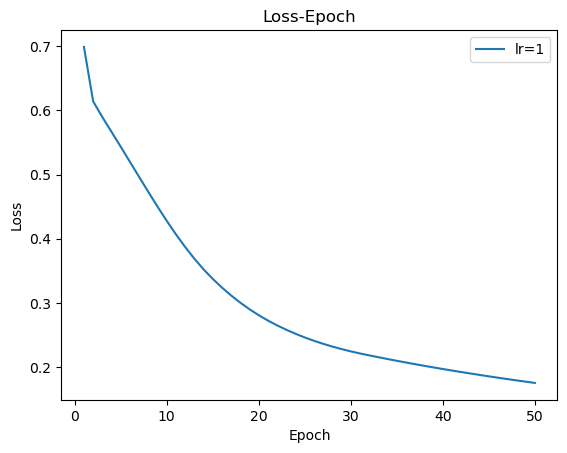

Model accuracy: 88.68%


In [4]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
 
# load dataset, split into input (X) and output (y) variables
dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data", header=None)
dataset = dataframe.values
X = dataset[:,0:34].astype(float)
y = dataset[:,34]
 
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
 
# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
 
# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
 
# create model
model = nn.Sequential(
    nn.Linear(34, 34),
    nn.ReLU(),
    nn.Linear(34, 1),
    nn.Sigmoid()
)
 
# Train the model
n_epochs = 50
lr = 1
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.3, total_iters=30)
model.train()
train_loss_list = []

for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    before_lr = optimizer.param_groups[0]["lr"]
    scheduler.step()
    after_lr = optimizer.param_groups[0]["lr"]
    print("Epoch %d: SGD lr %.4f -> %.4f" % (epoch, before_lr, after_lr))
    train_loss_list.append(loss.detach())

# plot the learning curve
plt.figure()
plt.title('Loss-Epoch')
plt.plot(range(1, len(train_loss_list) + 1), train_loss_list, label=f'lr={lr}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# evaluate accuracy after training
model.eval()
y_pred = model(X_test)
acc = (y_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

In the above, LinearLR() is used. 
It is a linear rate scheduler and it takes three additional parameters, the start_factor, end_factor, and total_iters. 
You set start_factor to 1.0, end_factor to 0.5, and total_iters to 30, therefore it will make a multiplicative factor decrease from 1.0 to 0.5, in 10 equal steps. 
After 10 steps, the factor will stay at 0.5. 
This factor is then multiplied to the original learning rate at the optimizer. 
Hence you will see the learning rate decreased from $0.1\times 1.0 = 0.1$ to $0.1\times 0.5 = 0.05$.

Besides `LinearLR()`, you can also use `ExponentialLR()`, its syntax is:

In [5]:
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.99)

If you replaced LinearLR() with this, you will see the learning rate updated as follows:

Epoch 0: SGD lr 1.0000 -> 0.9900
Epoch 1: SGD lr 0.9900 -> 0.9801
Epoch 2: SGD lr 0.9801 -> 0.9703
Epoch 3: SGD lr 0.9703 -> 0.9606
Epoch 4: SGD lr 0.9606 -> 0.9510
Epoch 5: SGD lr 0.9510 -> 0.9415
Epoch 6: SGD lr 0.9415 -> 0.9321
Epoch 7: SGD lr 0.9321 -> 0.9227
Epoch 8: SGD lr 0.9227 -> 0.9135
Epoch 9: SGD lr 0.9135 -> 0.9044
Epoch 10: SGD lr 0.9044 -> 0.8953
Epoch 11: SGD lr 0.8953 -> 0.8864
Epoch 12: SGD lr 0.8864 -> 0.8775
Epoch 13: SGD lr 0.8775 -> 0.8687
Epoch 14: SGD lr 0.8687 -> 0.8601
Epoch 15: SGD lr 0.8601 -> 0.8515
Epoch 16: SGD lr 0.8515 -> 0.8429
Epoch 17: SGD lr 0.8429 -> 0.8345
Epoch 18: SGD lr 0.8345 -> 0.8262
Epoch 19: SGD lr 0.8262 -> 0.8179
Epoch 20: SGD lr 0.8179 -> 0.8097
Epoch 21: SGD lr 0.8097 -> 0.8016
Epoch 22: SGD lr 0.8016 -> 0.7936
Epoch 23: SGD lr 0.7936 -> 0.7857
Epoch 24: SGD lr 0.7857 -> 0.7778
Epoch 25: SGD lr 0.7778 -> 0.7700
Epoch 26: SGD lr 0.7700 -> 0.7623
Epoch 27: SGD lr 0.7623 -> 0.7547
Epoch 28: SGD lr 0.7547 -> 0.7472
Epoch 29: SGD lr 0.7472 

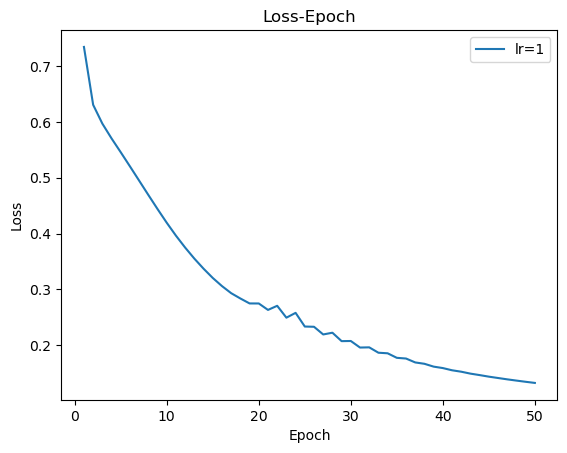

Model accuracy: 88.68%


In [6]:
# create model
model = nn.Sequential(
    nn.Linear(34, 34),
    nn.ReLU(),
    nn.Linear(34, 1),
    nn.Sigmoid()
)
 
# Train the model
n_epochs = 50
lr = 1
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.99)   
train_loss_list = []

for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    before_lr = optimizer.param_groups[0]["lr"]
    scheduler.step()
    after_lr = optimizer.param_groups[0]["lr"]
    print("Epoch %d: SGD lr %.4f -> %.4f" % (epoch, before_lr, after_lr))
    train_loss_list.append(loss.detach())

# plot the learning curve
plt.figure()
plt.title('Loss-Epoch')
plt.plot(range(1, len(train_loss_list) + 1), train_loss_list, label=f'lr={lr}')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# evaluate accuracy after training
model.eval()
y_pred = model(X_test)
acc = (y_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

In which the learning rate is updated by multiplying with a constant factor gamma in each scheduler update.

## Tips for Using Learning Rate Schedules

This section lists some tips and tricks to consider when using learning rate schedules with neural networks.

- Increase the initial learning rate. Because the learning rate will very likely decrease, start with a larger value to decrease from. A larger learning rate will result in a lot larger changes to the weights, at least in the beginning, allowing you to benefit from the fine-tuning later.
- Use a large momentum. Many optimizers can consider momentum. Using a larger momentum value will help the optimization algorithm continue to make updates in the right direction when your learning rate shrinks to small values.
- Experiment with different schedules. It will not be clear which learning rate schedule to use, so try a few with different configuration options and see what works best on your problem. Also, try schedules that change exponentially and even schedules that respond to the accuracy of your model on the training or test datasets.

## Summary

After reading this tutorial, you learned:

- How learning rate affects your model training
- How to set up learning rate schedule in PyTorch
- How to create a custom learning rate schedule

## Further Readings

Below is the documentation for more details on using learning rates in PyTorch:

- [How to adjust learning rate](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate), from PyTorch documentation